## PRS-Environment Interactions - African Ancestry

In [1]:
## Loading libraries 
suppressPackageStartupMessages({
    library(dplyr)
    library(data.table)
    library(tidyr)
})

## Step 1: Data preparation

df <- read.csv('new_balanced_afr.csv', sep = ",")

In [2]:
#

In [3]:
head(df)

,IID,age,sex,pop,ever_smoked,sleep_dur,alcohol_intake,av_income,bmi,bmr,total_met,weight,height,whr,townsend,cmcs,ipvs,diet_score,t2d_cc,prs_T2D
,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,3008472,52,1,AFR,0,5,6,1,34.4939,8577,3390,96.2,167,0.9907407,1.20,NA,NA,5,0,1.9397215
2,2674811,46,1,AFR,1,6,3,NA,29.7436,9355,NA,100.7,184,0.8771930,0.57,NA,NA,NA,0,-0.7910559
3,1577244,58,1,AFR,1,7,5,4,29.2969,6347,1133,75.0,160,1.0000000,3.43,NA,NA,8,1,-0.7891342
4,1569630,66,1,AFR,0,6,5,NA,30.7937,7841,NA,91.1,172,0.9428571,6.29,NA,NA,5,1,0.1477089
5,2505200,68,1,AFR,1,4,5,NA,24.4204,6050,NA,63.3,161,0.9032258,7.20,NA,NA,1,0,-0.4124752
6,1726075,66,0,AFR,1,8,5,4,31.7891,6594,1162,85.5,164,0.9705882,-4.73,NA,NA,6,1,1.8801479


## 1. Data Preprocessing

In [4]:
### Removing unnecessary columns
library(dplyr)
df <- df %>% select(-c('pop', 'weight', 'height'))

In [5]:
head(df)

,IID,age,sex,ever_smoked,sleep_dur,alcohol_intake,av_income,bmi,bmr,total_met,whr,townsend,cmcs,ipvs,diet_score,t2d_cc,prs_T2D
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,3008472,52,1,0,5,6,1,34.4939,8577,3390,0.9907407,1.20,NA,NA,5,0,1.9397215
2,2674811,46,1,1,6,3,NA,29.7436,9355,NA,0.8771930,0.57,NA,NA,NA,0,-0.7910559
3,1577244,58,1,1,7,5,4,29.2969,6347,1133,1.0000000,3.43,NA,NA,8,1,-0.7891342
4,1569630,66,1,0,6,5,NA,30.7937,7841,NA,0.9428571,6.29,NA,NA,5,1,0.1477089
5,2505200,68,1,1,4,5,NA,24.4204,6050,NA,0.9032258,7.20,NA,NA,1,0,-0.4124752
6,1726075,66,0,1,8,5,4,31.7891,6594,1162,0.9705882,-4.73,NA,NA,6,1,1.8801479


### Data standardisation

In [6]:
## Selecting the numerical features
library(dplyr)

cat_col <- c('sex','ever_smoked', 'alcohol_intake', 'av_income')
num_col <- c('age', 'sleep_dur', 'bmi', 'bmr', 'total_met', 'whr', 'prs_T2D','townsend','cmcs','ipvs', 'diet_score')
## standardising the numerical features
df <- df %>%
  mutate(across(all_of(num_col), ~ as.numeric(scale(.))))

In [7]:
head(df)

,IID,age,sex,ever_smoked,sleep_dur,alcohol_intake,av_income,bmi,bmr,total_met,whr,townsend,cmcs,ipvs,diet_score,t2d_cc,prs_T2D
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,3008472,-0.1681064,1,0,-1.1278164,6,1,0.71498417,1.2349293,0.2976752,1.2705449,-0.4745399,NA,NA,0.2740763,0,1.801939670
2,2674811,-0.8848217,1,1,-0.4831566,3,NA,-0.11522122,1.8181276,NA,-0.1798365,-0.6582201,NA,NA,NA,0,-0.950630235
3,1577244,0.5486088,1,1,0.1615033,5,4,-0.19329056,-0.4367060,-0.5265876,1.3888164,0.1756298,NA,NA,2.1078905,1,-0.948693169
4,1569630,1.5042292,1,0,-0.4831566,5,NA,0.06830375,0.6832147,NA,0.6589126,1.0094797,NA,NA,0.2740763,1,-0.004373797
5,2505200,1.7431343,1,1,-1.7724763,5,NA,-1.04555181,-0.6593408,NA,0.1526890,1.2747956,NA,NA,-2.1710094,0,-0.569028355
6,1726075,1.5042292,0,1,0.8061632,5,4,0.24226886,-0.2515518,-0.5159967,1.0131306,-2.2034665,NA,NA,0.8853477,1,1.741890643


In [8]:
table(df$t2d_cc)


   0    1 
1478 1478 

## 2. Checking for Marginal (Main effects)

In [9]:
#converting categorical features and factors 
df[cat_col] <- lapply(df[cat_col], as.factor)

In [10]:
## checking the result of the assignment
sapply(df[cat_col], class)

sex    ever_smoked alcohol_intake      av_income 
      "factor"       "factor"       "factor"       "factor"

### 2.1 Checking for Main effects: Numerical Features

# A tibble: 11 × 7
   variable_clean     OR lower_CI upper_CI  p.value p_adj_bonf significance_bonf
   <chr>           <dbl>    <dbl>    <dbl>    <dbl>      <dbl> <chr>            
 1 Age             2.05     1.89     2.23  1.37e-62   1.50e-61 True             
 2 Body Mass Index 1.91     1.75     2.10  4.94e-45   5.43e-44 True             
 3 Waist-Hip Ratio 1.89     1.70     2.11  9.74e-31   1.07e-29 True             
 4 PRS (T2D)       1.50     1.38     1.63  2.71e-21   2.98e-20 True             
 5 Townsend Index  1.23     1.13     1.33  8.81e- 7   9.70e- 6 True             
 6 Physical Activ… 0.888    0.804    0.980 1.78e- 2   1.96e- 1 False            
 7 Diet Score      1.11     1.00     1.22  4.00e- 2   4.40e- 1 False            
 8 Basal Metaboli… 1.00     0.844    1.19  9.85e- 1   1   e+ 0 False            
 9 Childhood Malt… 0.883    0.685    1.14  3.39e- 1   1   e+ 0 False            
10 Intimate Partn… 0.874    0.667    1.14  3.27e- 1   1   e+ 0 False            
11 Sleep 

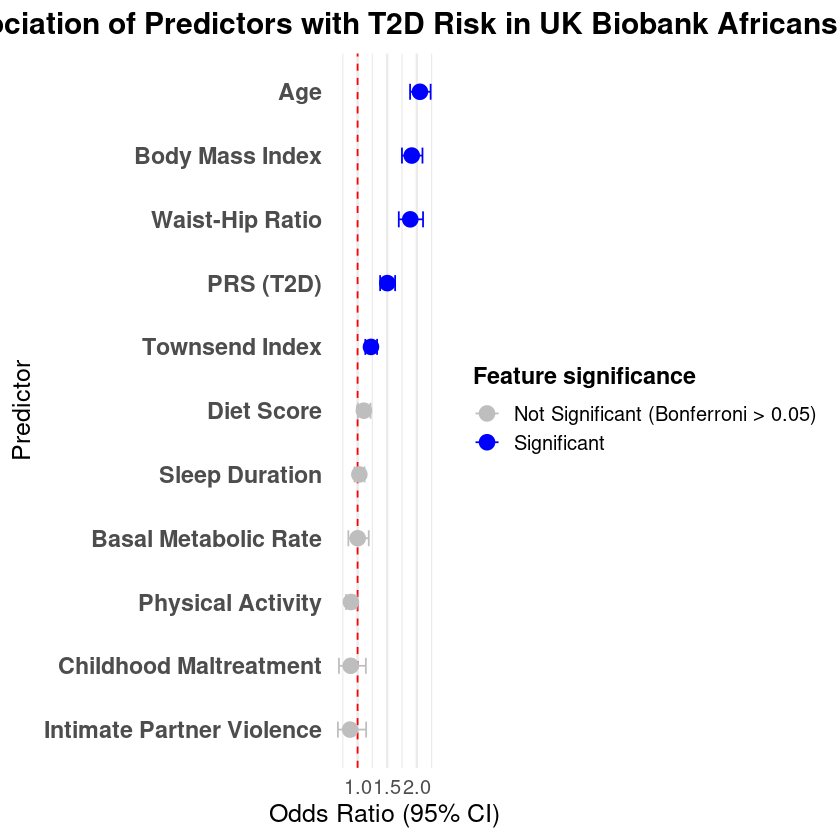

In [10]:
# ---- Libraries ----
library(dplyr)
library(broom)
library(ggplot2)

# ---- Define features ----
env_features <- c(
  "prs_T2D", "bmi", "whr", "diet_score", "bmr", "townsend", 
  "total_met", "cmcs", "ipvs", "av_income", "alcohol_intake", 
  "sleep_dur", "age"
)
# ---- Define covariates ----
base_covars <- c("bmi", "sex", "age", "ever_smoked")

# ---- Run logistic regressions ----
all_results <- lapply(env_features, function(featr) {
 formula <- as.formula(paste("t2d_cc ~", featr))
  model <- glm(formula, data = df, family = binomial)
  
  tidy(model) %>%
   mutate(variable = featr) %>%
    filter(term == featr)  # keep only the coefficient for that feature
}) %>% bind_rows()

# ---- Run logistic regressions with covariate adjustment ----
# all_results <- lapply(env_features, function(featr) {
  
#   # Remove the feature from covariates if it is also a covariate
#   covars_to_use <- setdiff(base_covars, featr)
  
#   # Build formula: t2d_cc ~ feature + covariates
#   formula <- as.formula(
#     paste("t2d_cc ~", paste(c(featr, covars_to_use), collapse = " + "))
#   )
  
#   model <- glm(formula, data = df, family = binomial)
  
#   tidy(model) %>%
#     mutate(variable = featr) %>%
#     filter(term == featr)   # keep only main predictor effect
# }) %>% bind_rows()

# ---- Apply Bonferroni correction ----
all_results <- all_results %>%
  mutate(
    p_adj_bonf = p.adjust(p.value, method = "bonferroni"),
    significance_bonf = ifelse(p_adj_bonf < 0.05, "True", "False")
  )

# ---- Define variable labels ----
labels_map <- c(
  prs_T2D = "PRS (T2D)",
  bmi = "Body Mass Index",
  whr = "Waist-Hip Ratio",
  diet_score = "Diet Score",
  bmr = "Basal Metabolic Rate",
  townsend = "Townsend Index",
  total_met = "Physical Activity",
  cmcs = "Childhood Maltreatment",
  ipvs = "Intimate Partner Violence",
  av_income = "Average Income",
  alcohol_intake = "Alcohol Intake",
  sleep_dur = "Sleep Duration",
  age = "Age"
)

# ---- Compute OR, CI, and relabel variables ----
plot_data <- all_results %>%
  mutate(
    OR = exp(estimate),
    lower_CI = exp(estimate - 1.96 * std.error),
    upper_CI = exp(estimate + 1.96 * std.error),
    variable_clean = recode(variable, !!!labels_map)
  )

# ---- Create forest plot ----
plot_final <- ggplot(plot_data, aes(x = OR, y = reorder(variable_clean, OR), color = significance_bonf)) +
  geom_vline(xintercept = 1, linetype = "dashed", color = "red") +
  geom_point(size = 4) +
  geom_errorbarh(aes(xmin = lower_CI, xmax = upper_CI), height = 0.25) +
  scale_color_manual(
    values = c("True" = "blue", "False" = "gray"),
    name = "Feature significance",
    labels = c("True" = "Significant ", "False" = "Not Significant (Bonferroni > 0.05)")
  ) +
  labs(
    x = "Odds Ratio (95% CI)",
    y = "Predictor",
    title = "Association of Predictors with T2D Risk in UK Biobank Africans"
  ) +
  theme_minimal(base_size = 15) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, size = 18),
    axis.text.y = element_text(face = "bold", size = 14),
    axis.text.x = element_text(size = 12),
    legend.title = element_text(size = 14, face = "bold"),
    legend.text = element_text(size = 12),
    panel.grid.major.y = element_blank()
  )

# ---- Display plot ----
print(plot_final)

# ---- Show table with Bonferroni-adjusted p-values ----
final_table <- plot_data %>%
  select(variable_clean, OR, lower_CI, upper_CI, p.value, p_adj_bonf, significance_bonf) %>%
  arrange(p_adj_bonf)

print(final_table)

write.table(
  final_table,
  file = "num_predictors_afr.csv",
  sep = "\t",
  row.names = FALSE,
  quote = FALSE
)


In [11]:
ggsave("finale_predict_num_afr.png", width = 12, height = 10, dpi = 300)

### 2.2 Checking for Main effects: Categorical Features

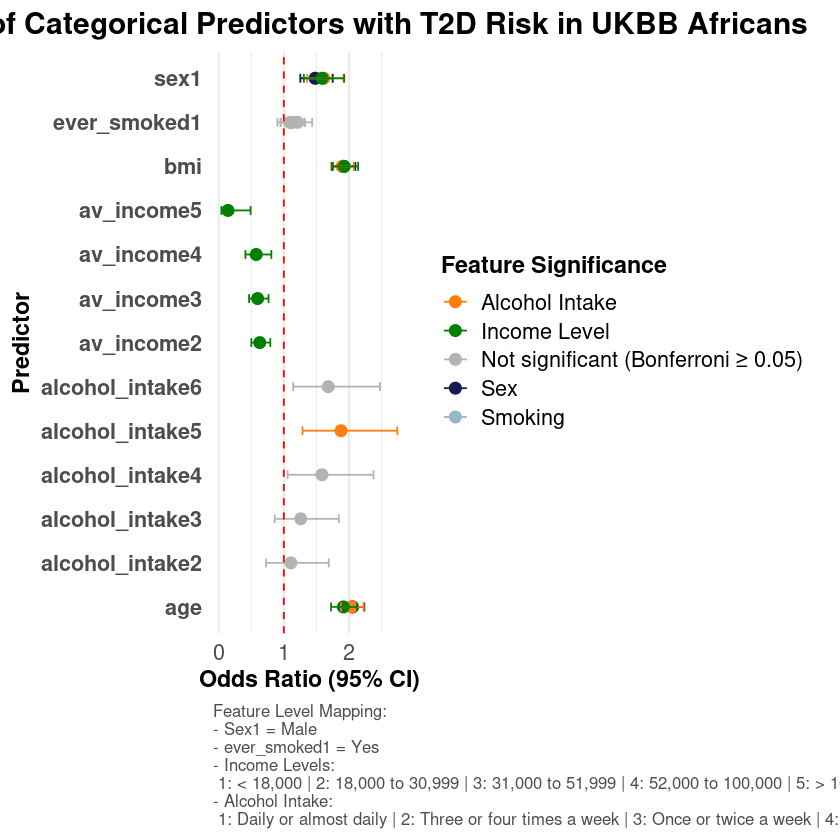

In [13]:
# ---- Load Libraries ----
library(dplyr)
library(broom)
library(ggplot2)
library(purrr)

# ---- Fit Logistic Models with covariate adjustment ----
# model_list <- lapply(cat_col, function(var) {
  
#   # Remove the predictor from covariates if overlapping
#   covars_to_use <- setdiff(base_covars, var)
  
#   formula <- as.formula(
#     paste("t2d_cc ~", paste(c(var, covars_to_use), collapse = " + "))
#   )
  
#   glm(formula, data = df, family = binomial)
# })

# names(model_list) <- c("Smoking", "Sex", "Alcohol Intake", "Income Level")

# ---- Fit Logistic Models ----
main_smoking <- glm(t2d_cc ~ ever_smoked, data = df, family = binomial)
main_sex     <- glm(t2d_cc ~ sex, data = df, family = binomial)
main_alcohol_relevel <- glm(t2d_cc ~ alcohol_intake, data = df, family = binomial)
main_income  <- glm(t2d_cc ~ av_income, data = df, family = binomial)

# ---- Store all models in a named list ----
model_list <- list(
 "Alcohol Intake" = main_alcohol_relevel,
 "Income Level"   = main_income,
 "Sex"            = main_sex,
 "Smoking"        = main_smoking
)

# ---- Function to process models ----
process_model <- function(model, label) {
  tidy(model) %>% 
    mutate(
      lower      = estimate - 1.96 * std.error,
      upper      = estimate + 1.96 * std.error,
      variable   = label,
      odds_ratio = exp(estimate),
      lower_or   = exp(lower),
      upper_or   = exp(upper)
    ) %>%
    filter(term != "(Intercept)")
}

# ---- Apply to all models and combine ----
combined_df <- imap_dfr(model_list, process_model)

# ---- Apply Bonferroni correction ----
combined_df <- combined_df %>%
  mutate(
    p_adj_bonf = p.adjust(p.value, method = "bonferroni"),
    significant_bonf = p_adj_bonf < 0.05
  )

# ---- Define colors ----
variable_colors <- c(
  "Alcohol Intake" = "#ff7f0e",
  "Income Level"   = "#008000",
  "Sex"            = "#151B54",
  "Smoking"        = "#95B9C7"
)

# ---- Update coloring based on Bonferroni-adjusted significance ----
combined_df <- combined_df %>%
  mutate(plot_group = ifelse(significant_bonf, variable, "Not significant"))

plot_colors <- c(variable_colors, "Not significant" = "gray70")

# ---- Define Feature Legend Text ----
feature_legend <- paste(
  "Feature Level Mapping:",
  "\n- Sex1 = Male",
  "\n- ever_smoked1 = Yes",
  "\n- Income Levels:",
  "\n 1: < 18,000 |",  " 2: 18,000 to 30,999 |",  " 3: 31,000 to 51,999 |",  " 4: 52,000 to 100,000 |",  " 5: > 100,000",
  "\n- Alcohol Intake:",
  "\n 1: Daily or almost daily |",  " 2: Three or four times a week |",  " 3: Once or twice a week |",  " 4: One to three times a month |",
    " 5: Special occasions only |",  " 6: Never",
  sep = ""
)

# ---- Plot Odds Ratios with Bonferroni Significance ----
plot2 <- ggplot(combined_df, aes(x = term, y = odds_ratio)) +
  geom_point(aes(color = plot_group), size = 3) +
  geom_errorbar(aes(ymin = lower_or, ymax = upper_or, color = plot_group), width = 0.2) +
  scale_color_manual(
    values = plot_colors,
    name = "Feature Significance",
    labels = function(x) ifelse(x == "Not significant", "Not significant (Bonferroni ≥ 0.05)", x)
  ) +
  geom_hline(yintercept = 1, linetype = "dashed", color = "red") +
  coord_flip() +
  labs(
    title = "Association of Categorical Predictors with T2D Risk in UKBB Africans",
    #subtitle = "Bonferroni-adjusted significance (α = 0.05)",
    x = "Predictor",
    y = "Odds Ratio (95% CI)",
    caption = feature_legend
  ) +
  theme_minimal(base_size = 14) +  # <--- increases all base font sizes
  theme(
    legend.position = "right",
    legend.text = element_text(size = 13),
    legend.title = element_text(size = 14, face = "bold"),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    plot.caption = element_text(size = 10, hjust = 0, color = "gray30"),
    axis.title = element_text(size = 14, face = "bold"),
    axis.text = element_text(size = 13),
    panel.grid.major.y = element_blank(),
    axis.text.y = element_text(face = "bold")
  )

# ---- Print Plot ----
print(plot2)

# ---- Optional: View Table of Adjusted Results ----
cat_table <- combined_df %>%
  select(variable, term, odds_ratio, lower_or, upper_or, p.value, p_adj_bonf, significant_bonf) %>%
  arrange(p_adj_bonf)

write.table(
  cat_table,
  file = "cat_predictors_afr.csv",
  sep = "\t",
  row.names = FALSE,
  quote = FALSE
)

In [14]:
ggsave("predict_cat_afr_finale.png", width = 12, height = 8, dpi = 300)

in R, the logistic regression model automatcally treats alcohol_intake1 (the first category: "Daily or almost daily") as the reference category. <br>
**meaning:**<br>
    alcohol_intake2 (3–4 times/week drinkers) have 0.39 higher log-odd of T2D with respect to daily drinkers

We can change the reference to Never drinkers and see the difference
<code>
df$alcohol_intake <- relevel(factor(df$alcohol_intake), ref = "6")  # Now "Never" is reference
main_alcohol_relevel <- glm(t2d_cc ~ alcohol_intake, data = df, family = binomial)
summary(main_alcohol_relevel)
</code>

## 3. PRS - Environment Interaction testing

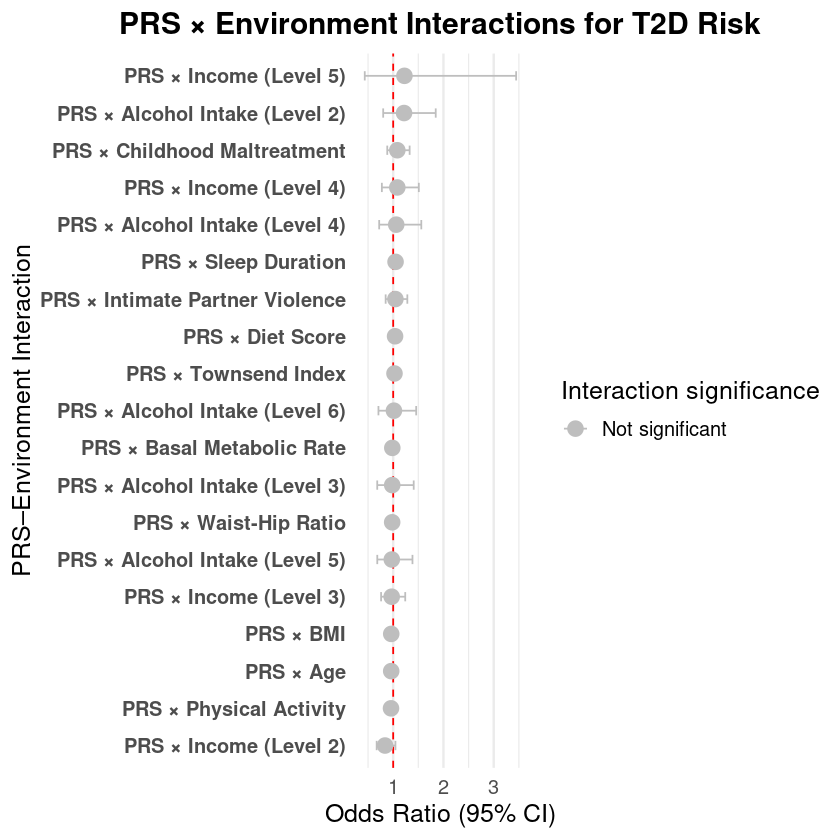

In [12]:
### Define PRS interaction features
interaction_features <- c(
  "bmi", "whr", "diet_score", "bmr", "townsend",
  "total_met", "cmcs", "ipvs", "av_income",
  "alcohol_intake", "sleep_dur", "age"
)

## Run PRS-feature interaction models
library(dplyr)
library(broom)
library(purrr)

interaction_results <- lapply(interaction_features, function(feat) {

  formula <- as.formula(
    paste("t2d_cc ~ prs_T2D +", feat, "+ prs_T2D:", feat)
  )

  model <- glm(formula, data = df, family = binomial)

  tidy(model) %>%
    filter(grepl("prs_T2D:", term)) %>%
    mutate(
      feature = feat,
      # Extract level name if factor (text after feature name)
      level = gsub(paste0("prs_T2D:", feat), "", term),
      level = ifelse(level == "", "Continuous", level)
    )
}) %>% bind_rows()

### Compute Odds Ratios, CI, and Bonferroni correction
interaction_results <- interaction_results %>%
  mutate(
    OR = exp(estimate),
    lower_CI = exp(estimate - 1.96 * std.error),
    upper_CI = exp(estimate + 1.96 * std.error),
    p_adj_bonf = p.adjust(p.value, method = "bonferroni"),
    significant_bonf = p_adj_bonf < 0.05
  )
### apply readable labels
interaction_labels <- c(
  bmi = "PRS × BMI",
  whr = "PRS × Waist-Hip Ratio",
  diet_score = "PRS × Diet Score",
  bmr = "PRS × Basal Metabolic Rate",
  townsend = "PRS × Townsend Index",
  total_met = "PRS × Physical Activity",
  cmcs = "PRS × Childhood Maltreatment",
  ipvs = "PRS × Intimate Partner Violence",
  av_income = "PRS × Income",
  alcohol_intake = "PRS × Alcohol Intake",
  sleep_dur = "PRS × Sleep Duration",
  age = "PRS × Age"
)

interaction_results <- interaction_results %>%
  mutate(
    interaction_label = case_when(
      level == "Continuous" ~ recode(feature, !!!interaction_labels),
      TRUE ~ paste0(recode(feature, !!!interaction_labels), " (Level ", level, ")")
    )
  )
## forest plot for PRS-feature interactions 
library(ggplot2)

forest_interaction <- ggplot(
  interaction_results,
  aes(
    x = OR,
    y = reorder(interaction_label, OR),
    color = significant_bonf
  )
) +
  geom_vline(xintercept = 1, linetype = "dashed", color = "red") +
  geom_point(size = 4) +
  geom_errorbarh(
    aes(xmin = lower_CI, xmax = upper_CI),
    height = 0.25
  ) +
  scale_color_manual(
    values = c("TRUE" = "blue", "FALSE" = "gray"),
    labels = c("TRUE" = "Significant (Bonferroni < 0.05)",
               "FALSE" = "Not significant"),
    name = "Interaction significance"
  ) +
  labs(
    x = "Odds Ratio (95% CI)",
    y = "PRS–Environment Interaction",
    title = "PRS × Environment Interactions for T2D Risk"
  ) +
  theme_minimal(base_size = 15) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    axis.text.y = element_text(face = "bold"),
    panel.grid.major.y = element_blank()
  )

print(forest_interaction)
### Export interaction results to .tsv
interaction_table <- interaction_results %>%
  select(
    feature,
    level,
    interaction_label,
    OR,
    lower_CI,
    upper_CI,
    p.value,
    p_adj_bonf,
    significant_bonf
  ) %>%
  arrange(p_adj_bonf)


write.table(
  interaction_table,
  file = "prs_environment_interactions_afr.csv",
  sep = "\t",
  row.names = FALSE,
  quote = FALSE
)


In [18]:
ggsave("prsxfeature_afr.png", width = 12, height = 8, dpi = 300)